In [95]:
import pandas as pd

In [168]:
INC = pd.read_csv('Data/Incidents.csv')
INC.head()

,Unnamed: 0,FID,Join_Count,TARGET_FID,Join_Cou_1,TARGET_F_1,incident_i,case_numbe,incident_d,incident_t,...,MEAN_TEMPERATUREF,PRECIPITATIONIN,EVENTS,MEAN_VISIBILITYMILES,CityName,IncidentGroup2,TotalPoverty,Weatherstr,weatherEventGroup,ZoningGroup
0,0,0,1,0,1,1,787108492,59881,12/30/2016 01:49:00 PM,INFORMATION REPORT,...,41.0,0.00,NaN,10.0,DUNWOODY,Other,598.0,NaN,NaN,Office
1,1,1,1,1,1,2,787300346,59906,01/01/2017 01:00:00 AM,INFORMATION REPORT,...,NaN,NaN,NaN,NaN,DUNWOODY,Other,874.0,NaN,NaN,Office
2,2,2,1,2,0,3,787147954,59892,12/31/2016 02:12:00 AM,FAMILY OFFENSE-NO VIOLENCE,...,38.0,0.17,Rain,9.0,DUNWOODY,Family Offense,66.5,Rain,Rain,
3,3,3,1,3,0,4,787174660,59898,12/31/2016 09:39:00 AM,SPEEDING,...,38.0,0.17,Rain,9.0,DUNWOODY,Traffic,12.0,Rain,Rain,
4,4,4,1,4,0,5,762180594,54597,06/13/2016 06:07:00 PM,FAIL TO YIELD TURNING LEFT,...,87.0,0.00,NaN,10.0,DUNWOODY,Traffic,272.0,NaN,NaN,


In [169]:
INC.shape

(93014, 54)

In [170]:
INC.dtypes

Unnamed: 0                int64
FID                       int64
Join_Count                int64
TARGET_FID                int64
Join_Cou_1                int64
TARGET_F_1                int64
incident_i                int64
case_numbe                int64
incident_d               object
incident_t               object
incident_1               object
address                  object
city                     object
state                    object
zip                       int64
latitude                float64
longitude               float64
hour_of_da                int64
day_of_wee               object
parent_inc               object
date_incid               object
SOURCE_ID                 int64
Gi_Bin                    int64
B25057e1                float64
B25058e1                float64
B25059e1                float64
B25076e1                float64
B25077e1                float64
B25078e1                float64
B25018e1                float64
B25001e1                float64
B25002e1

In [171]:
ColstoKeep = ['incident_d', 'zip', 'latitude', 'longitude', 'hour_of_da', 'day_of_wee', 'date_incid', 
              'B25057e1', 'B25058e1', 'B25059e1', 'B25076e1', 'B25077e1', 'B25078e1', 'B25018e1', 'B25001e1', 'B25002e1', 'B25002e2', 'B25002e3', 'B19013e1',
              'EST', 'MAX_TEMPERATUREF', 'PRECIPITATIONIN', 'MEAN_VISIBILITYMILES', 
              'CityName', 'IncidentGroup2', 'TotalPoverty', 'weatherEventGroup', 'ZoningGroup']
data = INC[ColstoKeep]
data.head()

,incident_d,zip,latitude,longitude,hour_of_da,day_of_wee,date_incid,B25057e1,B25058e1,B25059e1,...,B19013e1,EST,MAX_TEMPERATUREF,PRECIPITATIONIN,MEAN_VISIBILITYMILES,CityName,IncidentGroup2,TotalPoverty,weatherEventGroup,ZoningGroup
0,12/30/2016 01:49:00 PM,30346,33.927104,-84.331795,13,Friday,2016-12-30 00:00:00,938.5,1083.0,1305.5,...,55712.5,2016-12-30,50.0,0.00,10.0,DUNWOODY,Other,598.0,NaN,Office
1,01/01/2017 01:00:00 AM,30346,33.930271,-84.332347,1,Sunday,2017-01-01 00:00:00,911.0,1041.0,1298.0,...,67422.0,NaN,NaN,NaN,NaN,DUNWOODY,Other,874.0,NaN,Office
2,12/31/2016 02:12:00 AM,30338,33.925571,-84.315793,2,Saturday,2016-12-31 00:00:00,472.0,527.0,601.0,...,85000.5,2016-12-31,47.0,0.17,9.0,DUNWOODY,Family Offense,66.5,Rain,
3,12/31/2016 09:39:00 AM,0,33.943571,-84.331624,9,Saturday,2016-12-31 00:00:00,951.0,1046.5,1244.0,...,111182.0,2016-12-31,47.0,0.17,9.0,DUNWOODY,Traffic,12.0,Rain,
4,06/13/2016 06:07:00 PM,30346,33.926443,-84.337153,18,Monday,2016-06-13 00:00:00,922.5,1108.0,1329.0,...,67008.5,2016-6-13,99.0,0.00,10.0,DUNWOODY,Traffic,272.0,NaN,


In [172]:
# Categorical Columns to keep 
# INC.keepCols = keepCols = [u'hour_of_da', 
#                            u'day_of_wee', 
#                            u'weatherEventGroup',
#                            u'city', 
#                            u'zip', 
#                            u'ZoningGroup', 
#                            u'IncidentGroup2', 
#                            u'EST', 
#                            u'incident_d', 
#                            u'latitude', 
#                            u'longitude']


# df = INC[keepCols] 
# df.shape

In [173]:
INC['Join_Count'].value_counts()

1    93012
2        2
Name: Join_Count, dtype: int64

In [174]:
def Make1(value):
    if value == 2.0:
        return 1
    else:
        return value
INC['Join_Count'] = INC['Join_Count'].apply(Make1)
INC['Join_Count'].value_counts()

1    93014
Name: Join_Count, dtype: int64

In [175]:
INC.shape

(93014, 54)

In [176]:
data['zip'].value_counts()

0        60779
30338    12492
30346    11146
30360     2864
30328     2364
30350     2070
30342      889
30327      212
30339       84
30341       38
30071       23
30092       23
30319       15
30728        5
30324        3
30337        2
30340        1
30068        1
30294        1
30062        1
30076        1
Name: zip, dtype: int64

In [177]:
INC['IncidentGroup2'].value_counts()

Theft                   25150
Traffic                 17968
Other                   13026
Property Crime          11218
Breaking & Entering      5537
Disorder                 5316
Assault                  5201
Traffic - DUI            2826
Family Offense           2709
Drugs                    1481
Robbery                   831
Missing Person            686
Vehicle Recovery          278
Quality of Life           277
Death                     159
Weapons Offense           154
Other Sexual Offense       72
Liquor                     53
Arson                      37
Homicide                   18
Sexual Offense             16
Proactive Policing          1
Name: IncidentGroup2, dtype: int64

In [178]:
data.shape

(93014, 28)

https://www.youtube.com/watch?v=YPItfQ87qjM

In [179]:

# Categories[
#            (Categories.IncidentGroup2 == "Theft") | 
#            (Categories.IncidentGroup2 == "Traffic") |
#            (Categories.IncidentGroup2 == "Property Crime") |
#            (Categories.IncidentGroup2 == "Breaking & Entering") |
#            (Categories.IncidentGroup2 == "Disorder") | 
#            (Categories.IncidentGroup2 == "Assault") |
#            (Categories.IncidentGroup2 == "Traffic - DUI") |
#            (Categories.IncidentGroup2 == "Family Offense") |
#            (Categories.IncidentGroup2 == "Drugs")
# ].head(20)

valuesToKeep = ["Theft","Traffic","Property Crime","Breaking & Entering","Disorder","Assault",
               "Traffic - DUI", "Family Offense","Drugs"]

dataM = data[ data.IncidentGroup2.isin(valuesToKeep) ]
dataM.IncidentGroup2.unique()



array(['Family Offense', 'Traffic', 'Disorder', 'Theft', 'Assault',
       'Property Crime', 'Breaking & Entering', 'Drugs', 'Traffic - DUI'], dtype=object)

In [180]:
print data.shape
print dataM.shape

(93014, 28)
(77406, 28)


In [181]:
dataM.weatherEventGroup.value_counts()

Rain    24012
Fog      4610
Snow      448
Name: weatherEventGroup, dtype: int64

In [182]:
print "ORIGINAL {} no weather Event".format(93014 - (28900 + 5514 + 532))
print "new df {} no weather Event".format(77406 - (24012 + 4610 + 448))

ORIGINAL 58068 no weather Event
new df 48336 no weather Event


In [183]:
print "ORGINAL {}% incidents no weather event".format((58068.0/93014)*100)
print "new df {}% incidents no weather event".format((48336.0/77406)*100)

ORGINAL 62.4293117165% incidents no weather event
new df 62.4447717231% incidents no weather event


In [184]:
dataM.ZoningGroup.value_counts()

                  26561
Commercial        16605
Multi-Dwelling    11654
Office             6943
Multi-Family       6312
Single-Family      4923
MIX                2272
CUP                 915
Townhouse           790
Industrial          198
Agriculture         175
NUP                  58
Name: ZoningGroup, dtype: int64

In [185]:
print "ORIGINAL {}% incidents point landed in the road (no Zoning)".format((31866.0/93014)*100)
print "new df {}% incidents point landed in the road (no Zoning)".format((26561.0/77406)*100)

ORIGINAL 34.2593588062% incidents point landed in the road (no Zoning)
new df 34.3138774772% incidents point landed in the road (no Zoning)


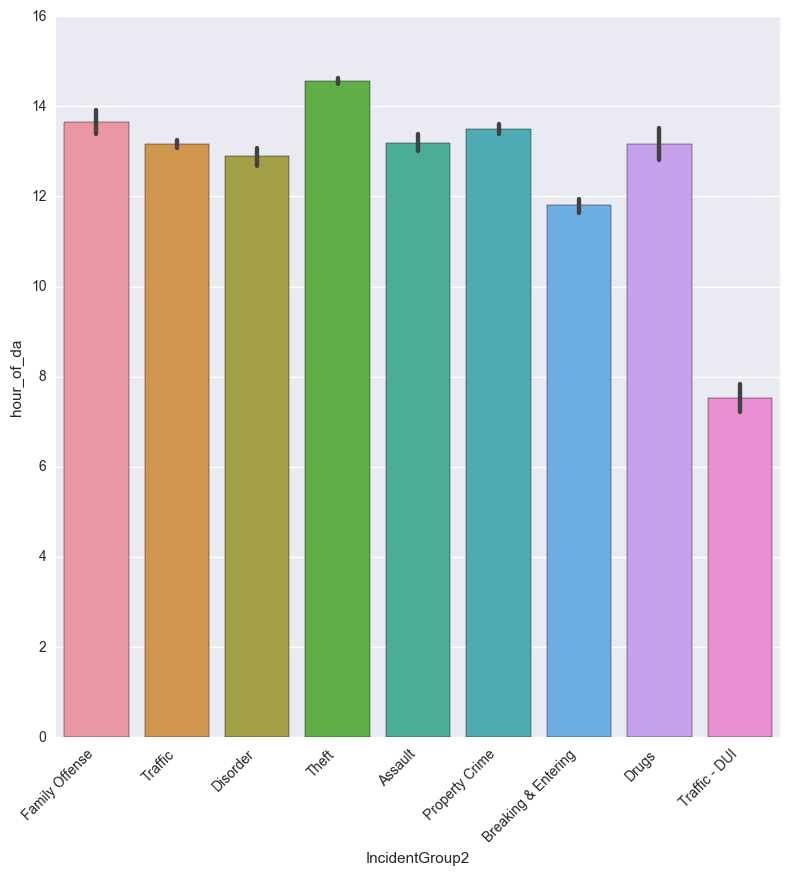

In [137]:
dataM.groupby(['IncidentGroup2'])[['hour_of_da']]

import seaborn as sb
%matplotlib inline

p = sb.factorplot(x='IncidentGroup2', 
              y='hour_of_da',
              kind='bar',
              data = dataM,
              size = 8
            )
p.set_xticklabels(rotation=45, horizontalalignment='right')

In [186]:
dataM.head()

,incident_d,zip,latitude,longitude,hour_of_da,day_of_wee,date_incid,B25057e1,B25058e1,B25059e1,...,B19013e1,EST,MAX_TEMPERATUREF,PRECIPITATIONIN,MEAN_VISIBILITYMILES,CityName,IncidentGroup2,TotalPoverty,weatherEventGroup,ZoningGroup
2,12/31/2016 02:12:00 AM,30338,33.925571,-84.315793,2,Saturday,2016-12-31 00:00:00,472.0,527.0,601.0,...,85000.5,2016-12-31,47.0,0.17,9.0,DUNWOODY,Family Offense,66.5,Rain,
3,12/31/2016 09:39:00 AM,0,33.943571,-84.331624,9,Saturday,2016-12-31 00:00:00,951.0,1046.5,1244.0,...,111182.0,2016-12-31,47.0,0.17,9.0,DUNWOODY,Traffic,12.0,Rain,
4,06/13/2016 06:07:00 PM,30346,33.926443,-84.337153,18,Monday,2016-06-13 00:00:00,922.5,1108.0,1329.0,...,67008.5,2016-6-13,99.0,0.00,10.0,DUNWOODY,Traffic,272.0,NaN,
5,06/13/2016 06:40:00 PM,0,33.943571,-84.331624,18,Monday,2016-06-13 00:00:00,951.0,1046.5,1244.0,...,111182.0,2016-6-13,99.0,0.00,10.0,DUNWOODY,Traffic,12.0,NaN,
7,04/25/2016 01:58:00 PM,30346,33.925912,-84.336548,13,Monday,2016-04-25 00:00:00,922.5,1108.0,1329.0,...,67008.5,2016-4-25,81.0,0.00,10.0,DUNWOODY,Disorder,272.0,NaN,Office


http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br/>
http://scikit-learn.org/stable/modules/multiclass.html

Now going to build Random Forest Classification Model on the Data Frame.  Reminder - these rows are Incident point from Sandy Springs and Dunwoody 

In [187]:
dataM.dtypes
# ready to model
# ...maybe, hopefully ... 
# X is everything except "IncidentGroup2"
# Y is "IncidentGroup2" 10 categories 

incident_d               object
zip                       int64
latitude                float64
longitude               float64
hour_of_da                int64
day_of_wee               object
date_incid               object
B25057e1                float64
B25058e1                float64
B25059e1                float64
B25076e1                float64
B25077e1                float64
B25078e1                float64
B25018e1                float64
B25001e1                float64
B25002e1                float64
B25002e2                float64
B25002e3                float64
B19013e1                float64
EST                      object
MAX_TEMPERATUREF        float64
PRECIPITATIONIN          object
MEAN_VISIBILITYMILES    float64
CityName                 object
IncidentGroup2           object
TotalPoverty            float64
weatherEventGroup        object
ZoningGroup              object
dtype: object

### Here it goes - fitting data to Random Forest Classification
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html<br/>
http://scikit-learn.org/stable/modules/multiclass.html<br/>
http://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html <br/>
http://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder <br/>
http://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn

In [188]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [193]:
# dataM.drop('incident_d', axis = 1, inplace = True)
# have to get rid of the date column
dataM.head(10)

,zip,latitude,longitude,hour_of_da,day_of_wee,date_incid,B25057e1,B25058e1,B25059e1,B25076e1,...,B19013e1,EST,MAX_TEMPERATUREF,PRECIPITATIONIN,MEAN_VISIBILITYMILES,CityName,IncidentGroup2,TotalPoverty,weatherEventGroup,ZoningGroup
2,30338,33.925571,-84.315793,2,Saturday,2016-12-31 00:00:00,472.000000,527.000000,601.000000,210700.000000,...,85000.500000,2016-12-31,47.0,0.17,9.0,DUNWOODY,Family Offense,66.500000,Rain,
3,0,33.943571,-84.331624,9,Saturday,2016-12-31 00:00:00,951.000000,1046.500000,1244.000000,260900.000000,...,111182.000000,2016-12-31,47.0,0.17,9.0,DUNWOODY,Traffic,12.000000,Rain,
4,30346,33.926443,-84.337153,18,Monday,2016-06-13 00:00:00,922.500000,1108.000000,1329.000000,233850.000000,...,67008.500000,2016-6-13,99.0,0.00,10.0,DUNWOODY,Traffic,272.000000,NaN,
5,0,33.943571,-84.331624,18,Monday,2016-06-13 00:00:00,951.000000,1046.500000,1244.000000,260900.000000,...,111182.000000,2016-6-13,99.0,0.00,10.0,DUNWOODY,Traffic,12.000000,NaN,
7,30346,33.925912,-84.336548,13,Monday,2016-04-25 00:00:00,922.500000,1108.000000,1329.000000,233850.000000,...,67008.500000,2016-4-25,81.0,0.00,10.0,DUNWOODY,Disorder,272.000000,NaN,Office
8,30346,33.924482,-84.337816,15,Monday,2016-04-25 00:00:00,922.500000,1108.000000,1329.000000,233850.000000,...,67008.500000,2016-4-25,81.0,0.00,10.0,DUNWOODY,Theft,272.000000,NaN,
12,30346,33.923943,-84.340711,20,Thursday,2016-02-25 00:00:00,879.000000,1091.000000,1345.000000,260700.000000,...,90014.000000,2016-2-25,50.0,T,10.0,DUNWOODY,Family Offense,222.000000,Rain,Commercial
13,30338,33.943542,-84.338019,22,Thursday,2016-02-25 00:00:00,611.333333,730.333333,880.666667,300633.333333,...,120627.666667,2016-2-25,50.0,T,10.0,DUNWOODY,Traffic,101.666667,Rain,
14,30338,33.926104,-84.310545,22,Thursday,2016-02-25 00:00:00,913.500000,1019.500000,1164.500000,114150.000000,...,51265.000000,2016-2-25,50.0,T,10.0,DUNWOODY,Family Offense,147.000000,Rain,Office
15,30338,33.934538,-84.294781,9,Friday,2016-02-26 00:00:00,829.000000,915.500000,1104.500000,185250.000000,...,59004.500000,2016-2-26,51.0,0.00,10.0,DUNWOODY,Traffic,186.500000,NaN,


In [194]:
# fit = df.apply(lambda x: d[x.name].fit_transform(x))
# enc = df.apply(lambda x: d[x.ZoningGroup].fit_transform(x))
Encoded = dataM.apply(LabelEncoder().fit_transform)
Encoded.head(10)

,zip,latitude,longitude,hour_of_da,day_of_wee,date_incid,B25057e1,B25058e1,B25059e1,B25076e1,...,B19013e1,EST,MAX_TEMPERATUREF,PRECIPITATIONIN,MEAN_VISIBILITYMILES,CityName,IncidentGroup2,TotalPoverty,weatherEventGroup,ZoningGroup
2,12,6259,16423,2,2,2556,46,43,35,143,...,207,2308,20,111,8,3,4,74,2,0
3,0,10301,15670,9,2,2556,296,263,249,199,...,311,2308,20,111,8,3,7,5,2,0
4,17,6503,14905,18,1,2355,287,287,279,167,...,142,2440,72,93,9,3,7,267,0,0
5,0,10301,15670,18,1,2355,296,263,249,199,...,311,2440,72,93,9,3,7,5,0,0
7,17,6342,15004,13,1,2306,287,287,279,167,...,142,2392,54,93,9,3,2,267,0,9
8,17,6012,14803,15,1,2306,287,287,279,167,...,142,2392,54,93,9,3,6,267,0,0
12,17,5814,14370,20,4,2246,263,281,283,198,...,230,2332,23,256,9,3,4,235,2,3
13,12,10260,14763,22,4,2246,96,96,95,244,...,332,2332,23,256,9,3,7,116,2,0
14,12,6409,16693,22,4,2246,279,253,226,47,...,63,2332,23,256,9,3,4,176,2,9
15,12,8481,17819,9,0,2247,232,209,206,114,...,99,2333,24,93,9,3,7,207,0,0


In [192]:
# Fit Random Forest

model = DecisionTreeClassifier()

X = Encoded
y = X['IncidentGroup2']
X.drop('IncidentGroup2', axis = 1, inplace = True)

model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [198]:
FeatureImportance = model.feature_importances_
FeatureImportance

array([ 0.01021136,  0.07690343,  0.08372995,  0.10847596,  0.06928887,
        0.10752625,  0.01655095,  0.00864846,  0.01251364,  0.00989525,
        0.0100541 ,  0.0109246 ,  0.011231  ,  0.00859903,  0.0081511 ,
        0.00910748,  0.01349616,  0.01225964,  0.10322422,  0.10726526,
        0.0539265 ,  0.04304217,  0.02468635,  0.01405019,  0.01880618,
        0.04743188])

In [203]:
zip(FeatureImportance, dataM.columns)

[(0.010211363380070731, 'zip'),
 (0.076903426283211965, 'latitude'),
 (0.083729948714477836, 'longitude'),
 (0.10847596491064349, 'hour_of_da'),
 (0.06928886717134862, 'day_of_wee'),
 (0.10752624540678236, 'date_incid'),
 (0.016550948657133104, 'B25057e1'),
 (0.0086484638420940008, 'B25058e1'),
 (0.01251364266449397, 'B25059e1'),
 (0.0098952529593931415, 'B25076e1'),
 (0.010054102768575166, 'B25077e1'),
 (0.010924600030055272, 'B25078e1'),
 (0.011231000567242633, 'B25018e1'),
 (0.0085990304899301612, 'B25001e1'),
 (0.0081510981362666376, 'B25002e1'),
 (0.0091074766983246097, 'B25002e2'),
 (0.013496160248206142, 'B25002e3'),
 (0.012259637891258201, 'B19013e1'),
 (0.10322422479323373, 'EST'),
 (0.1072652647484916, 'MAX_TEMPERATUREF'),
 (0.053926503440418522, 'PRECIPITATIONIN'),
 (0.043042174197227723, 'MEAN_VISIBILITYMILES'),
 (0.024686351794846455, 'CityName'),
 (0.014050193784073897, 'IncidentGroup2'),
 (0.018806176196200557, 'TotalPoverty'),
 (0.047431880225999506, 'weatherEventGroup'